In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import linregress

In [15]:
def load_data(file_path):
    """
    Load the Population estimates by age and sex, by LGA, 2001 to 2022 (Douglas) CSV file.
    
    Args:
        file_path (str): The file path of the CSV file.
        
    Returns:
        pd.DataFrame: The loaded data as a pandas DataFrame.
    """
    return pd.read_csv(file_path)

def define_age_groups():
    """
    Define broad age groups for analysis.
    
    Returns:
        dict: A dictionary mapping age group names to lists of age range strings.
    """
    return {
        'Children': ['0004', '0509', '1014'],
        'Youth': ['1519', '2024'],
        'Adults': ['2529', '3034', '3539', '4044', '4549'],
        'MiddleAge': ['5054', '5559', '6064'],
        'Senior': ['6569', '7074', '7579', '8084', '85AndOver']
    }

def aggregate_population_by_age_group(data, age_groups):
    """
    Aggregate the population for each age group by year.
    
    Args:
        data (pd.DataFrame): The input data DataFrame.
        age_groups (dict): A dictionary mapping age group names to lists of age range strings.
        
    Returns:
        pd.DataFrame: A DataFrame with the aggregated population for each age group by year.
    """
    summary = {age_group: [] for age_group in age_groups}
    summary['Year'] = data['Year'].values

    for age_group, age_ranges in age_groups.items():
        total_population_by_age_group = pd.Series([0] * len(data))
        for age_range in age_ranges:
            total_population_by_age_group += data[f'Males{age_range}'] + data[f'Females{age_range}']
        summary[age_group] = total_population_by_age_group

    return pd.DataFrame(summary)

In [16]:
file_path = 'Data/Demographic/Age and Gender/Population estimates by age and sex, by LGA, 2001 to 2022 (Douglas).csv'
data = load_data(file_path)
age_groups = define_age_groups()
summary_df = aggregate_population_by_age_group(data, age_groups)

In [17]:
def calculate_changes(summary_df, age_groups):
    """
    Calculate the absolute and percentage change for each age group between 2001 and 2022.
    
    Args:
        summary_df (pd.DataFrame): The DataFrame with the aggregated population for each age group by year.
        age_groups (dict): A dictionary mapping age group names to lists of age range strings.
        
    Returns:
        tuple: A tuple containing the absolute change DataFrame and percentage change DataFrame.
    """
    absolute_change = {}
    percentage_change = {}

    for age_group in age_groups:
        start_population = summary_df[age_group].iloc[0]
        end_population = summary_df[age_group].iloc[-1]
        abs_change = end_population - start_population
        pct_change = (abs_change / start_population) * 100

        absolute_change[age_group] = abs_change
        percentage_change[age_group] = pct_change

    absolute_change_df = pd.DataFrame(list(absolute_change.items()), columns=['Age Group', 'Absolute Change'])
    percentage_change_df = pd.DataFrame(list(percentage_change.items()), columns=['Age Group', 'Percentage Change'])

    return absolute_change_df, percentage_change_df

def perform_linear_regression(summary_df, age_groups):
    """
    Perform linear regression for each age group.
    
    Args:
        summary_df (pd.DataFrame): The DataFrame with the aggregated population for each age group by year.
        age_groups (dict): A dictionary mapping age group names to lists of age range strings.
        
    Returns:
        pd.DataFrame: A DataFrame with the linear regression results for each age group.
    """
    regression_results = {}

    for age_group in age_groups:
        slope, intercept, r_value, p_value, std_err = linregress(summary_df['Year'], summary_df[age_group])
        regression_results[age_group] = {'slope': slope, 'p_value': p_value}

    return pd.DataFrame(regression_results).T

We can observe trends in the population dynamics of the Douglas area over the period.

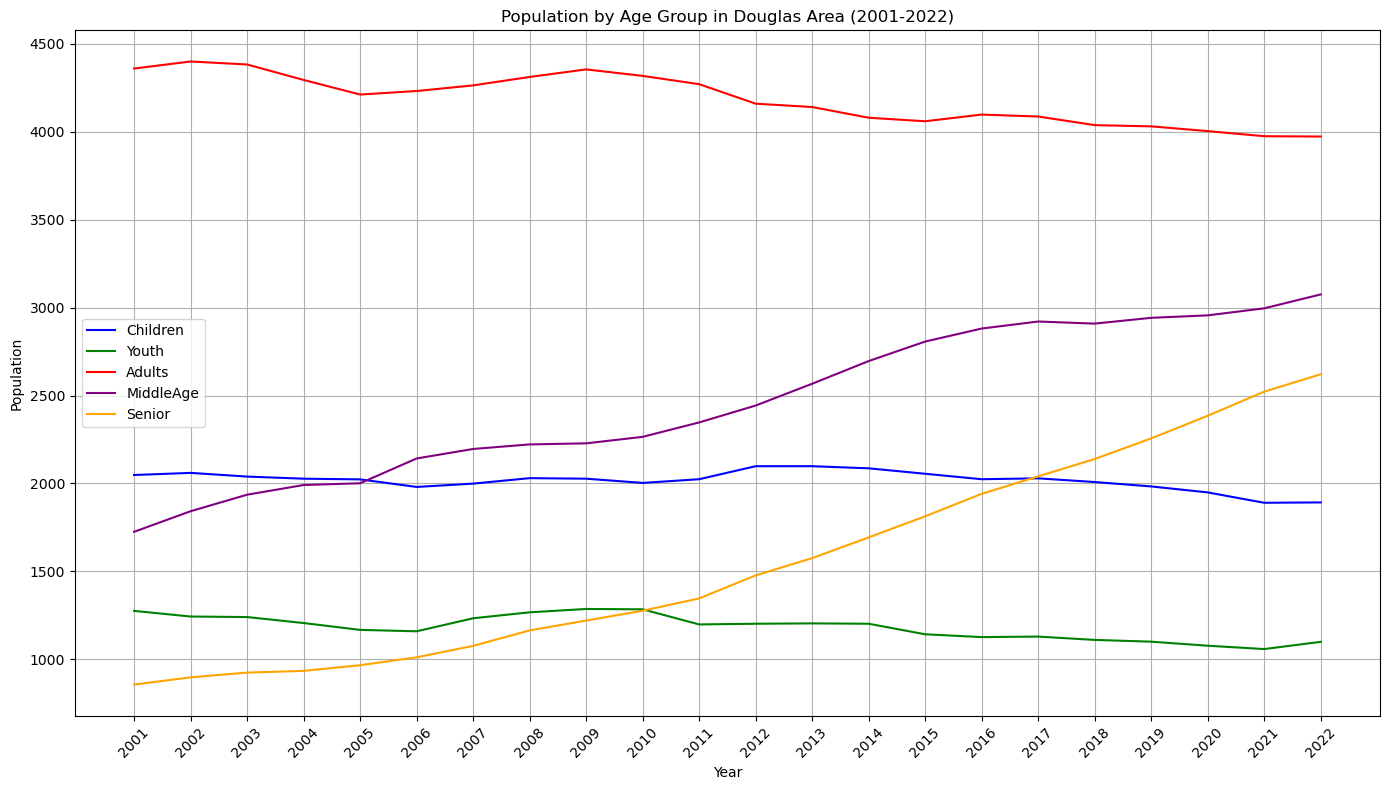

In [18]:
def plot_population_by_age_group(summary_df, age_groups):
    """
    Plot the changes in population by age group over time.
    
    Args:
        summary_df (pd.DataFrame): The DataFrame with the aggregated population for each age group by year.
    """
    plt.figure(figsize=(14, 8))
    colors = ['blue', 'green', 'red', 'purple', 'orange']
    for i, age_group in enumerate(age_groups):
        plt.plot(summary_df['Year'], summary_df[age_group], label=age_group, color=colors[i])

    plt.title('Population by Age Group in Douglas Area (2001-2022)')
    plt.xlabel('Year')
    plt.ylabel('Population')
    plt.legend()
    plt.grid(True)
    plt.xticks(summary_df['Year'], rotation=45)
    plt.tight_layout()
    plt.show()

# Plotting the changes in population by age group over time
plot_population_by_age_group(summary_df, age_groups)

## Absolute and Percentage Change

Children (up to 14): There was a decrease of 156 in population size, translating to a -7.62% change.
Youth (15-24): The population decreased by 176, resulting in a -13.80% change.
Adults (25-49): This group saw a decrease of 387, equivalent to an -8.88% change.
MiddleAge (50-64): Experienced an increase of 1350, which is a significant 78.26% change.
Senior (65+): The most substantial increase was in the senior population, with 1765 more individuals, marking a 206.19% change.

In [19]:
# Calculating the absolute and percentage change for each age group between 2001 and 2022
absolute_change_df, percentage_change_df = calculate_changes(summary_df, age_groups)
print("Absolute Change:")
print(absolute_change_df)
print("\nPercentage Change:")
print(percentage_change_df)

Absolute Change:
   Age Group  Absolute Change
0   Children             -156
1      Youth             -176
2     Adults             -387
3  MiddleAge             1350
4     Senior             1765

Percentage Change:
   Age Group  Percentage Change
0   Children          -7.617188
1      Youth         -13.803922
2     Adults          -8.876147
3  MiddleAge          78.260870
4     Senior         206.191589


# Significance

Linear Regression Analysis: By treating the year as an independent variable and the population of each age group as the dependent variable, we can use linear regression to estimate the trend line for each age group over time.


Linear Regression Results (Slope and p-value):
               slope       p_value
Children   -4.120836  2.078392e-02
Youth      -8.547149  9.907486e-06
Adults    -20.178995  6.959064e-10
MiddleAge  65.418408  1.097514e-17
Senior     87.462451  8.329232e-16


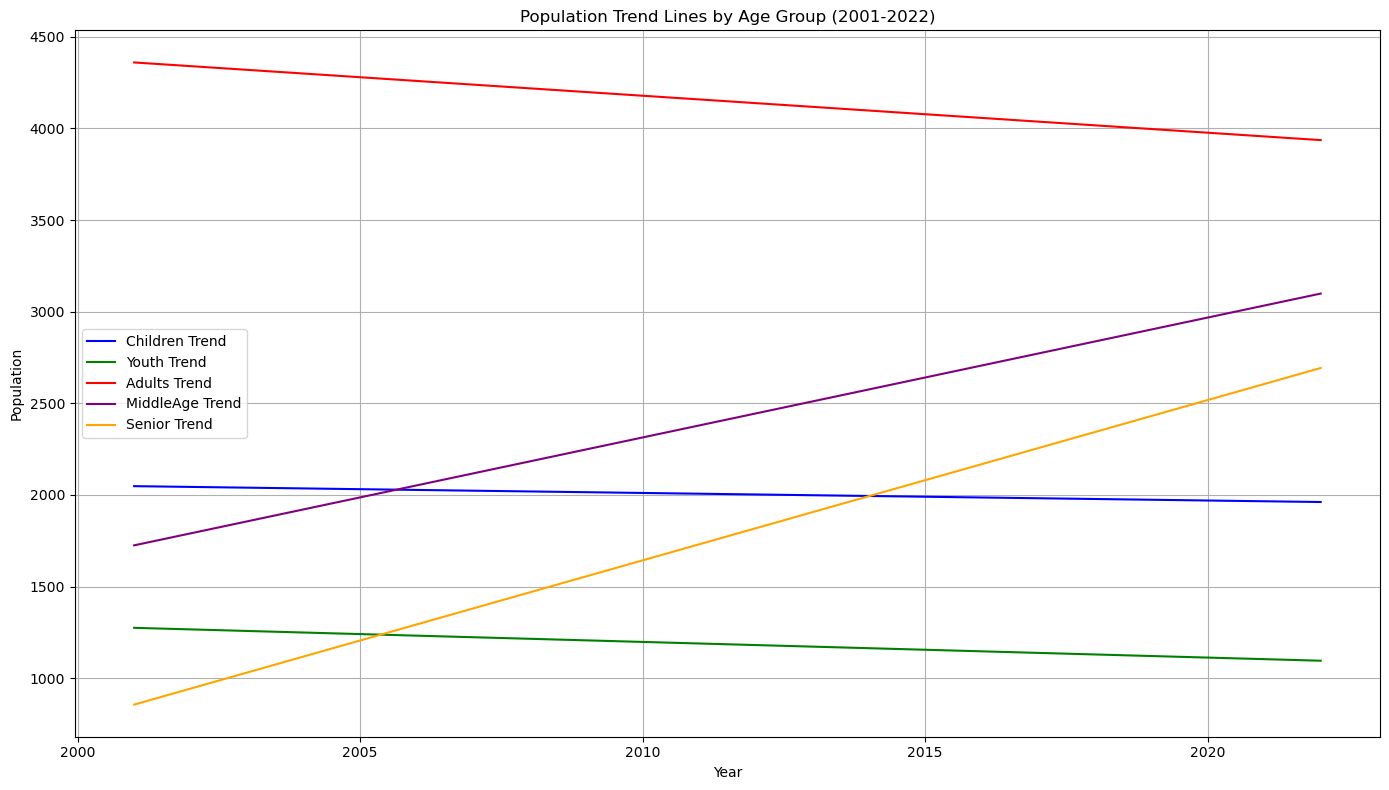

In [20]:
def plot_trend_lines(summary_df, regression_results, age_groups):
    """
    Plot trend lines for all age groups on a single visualization with a unified y-axis scale.
    
    Args:
        summary_df (pd.DataFrame): The DataFrame with the aggregated population for each age group by year.
        regression_results (pd.DataFrame): A DataFrame with the linear regression results for each age group.
        age_groups (dict): A dictionary mapping age group names to lists of age range strings.
    """
    plt.figure(figsize=(14, 8))
    colors = ['blue', 'green', 'red', 'purple', 'orange']

    for i, age_group in enumerate(age_groups):
        slope = regression_results.loc[age_group, 'slope']
        intercept = summary_df[age_group].iloc[0] - (slope * summary_df['Year'].iloc[0])
        plt.plot(summary_df['Year'], slope * summary_df['Year'] + intercept, color=colors[i], label=f'{age_group} Trend')

    plt.title('Population Trend Lines by Age Group (2001-2022)')
    plt.xlabel('Year')
    plt.ylabel('Population')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Performing linear regression for each age group
regression_results_df = perform_linear_regression(summary_df, age_groups)
print("\nLinear Regression Results (Slope and p-value):")
print(regression_results_df[['slope', 'p_value']])

# Plotting trend lines for all age groups on a single visualization with a unified y-axis scale
plot_trend_lines(summary_df, regression_results_df, age_groups)

The linear regression analysis for each age group reveals:

- Children: The slope of the regression line is -4.12, with a p-value of 0.021, indicating a statistically significant decrease in the children population over time.
- Youth: With a slope of -8.55 and a p-value of approximately 0.00001, this group also shows a statistically significant decline.
- Adults: Exhibits a significant decrease with a slope of -20.18 and a p-value close to 0, further confirming a significant downward trend.
- MiddleAge: Contrasts the younger groups with a positive slope of 65.42 and a p-value effectively 0, indicating a highly significant increase.
- Senior: Shows the most substantial growth with a slope of 87.46 and a similarly negligible p-value, confirming a statistically significant increase.

These results indicate that the observed changes in population sizes for each age group are not random fluctuations but statistically significant trends. Specifically, the population of Douglas area is experiencing a notable decrease among younger age groups (Children, Youth, Adults) and significant increases in the MiddleAge and Senior populations over the period studied. These trends highlight a demographic shift towards an older population.

## Year-over-Year Change Analysis

The year-over-year change provides insights into the consistency of growth or decline across the years:

The average yearly change indicates that while the populations of children, youth, and adults have generally decreased (with average yearly changes of -7.43, -8.38, and -18.43, respectively), the middle-aged and senior populations have seen significant increases (with average yearly changes of +64.29 and +84.05, respectively).
The standard deviation values suggest variability in the year-over-year changes for each group, with the senior population experiencing the most consistent growth.

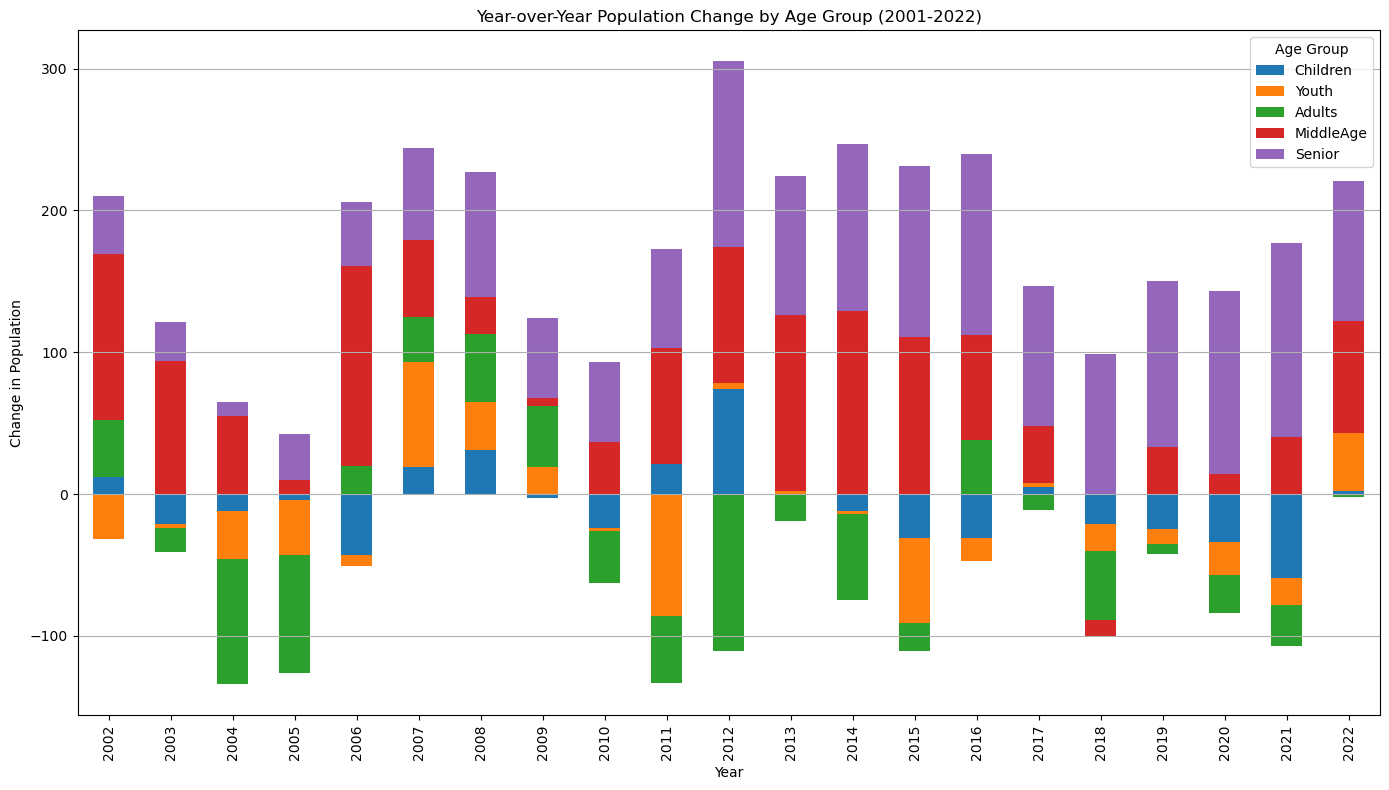

In [21]:
def plot_year_over_year_change(summary_df):
    """
    Plot a bar chart of the year-over-year population change by age group.
    
    Args:
        summary_df (pd.DataFrame): The DataFrame with the aggregated population for each age group by year.
    """
    year_over_year_change = summary_df.set_index('Year').diff().dropna()

    year_over_year_change.plot(kind='bar', stacked=True, figsize=(14, 8))
    plt.title('Year-over-Year Population Change by Age Group (2001-2022)')
    plt.xlabel('Year')
    plt.ylabel('Change in Population')
    plt.legend(title='Age Group')
    plt.grid(True, axis='y')
    plt.tight_layout()
    plt.show()

# Preparing data for year-over-year change analysis
year_over_year_change = summary_df.set_index('Year').diff().dropna()

# Bar chart of annual changes
plot_year_over_year_change(summary_df)